In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ширина вывода
pd.set_option('display.max_colwidth', None)  # Макс. ширина колонок

In [3]:
df = pd.read_csv("weatherAUS.csv")
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()
df = df.dropna() 

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
from sklearn.pipeline import Pipeline

matplotlib.style.use('ggplot')
%matplotlib inline

In [5]:
df = df.drop('Date', axis=1)

In [6]:
def MultiColumnLabelEncoder(columns,df):
    X = df.iloc[:].values
    for i in range(len(columns)):
        X[:, columns[i]] = labelencoder.fit_transform(X[:, columns[i]])
    df = pd.DataFrame(X, columns=df.columns, index = df.index)
    return df

In [7]:
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19, 20,21]
df = MultiColumnLabelEncoder(columns,df)

In [8]:
y = df['RainTomorrow']
df = df.drop('RainTomorrow', axis = 1)

In [9]:
X = pd.DataFrame(df, index = df.index, columns = df.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,4,227,283,0,120,123,11,21,1,12,2,10,20,13,170,177,2,5,270,280,0
6050,4,232,220,0,140,130,8,15,10,10,9,9,30,8,236,254,1,1,207,216,0
6052,4,242,307,0,108,106,5,20,5,6,15,7,42,22,230,225,1,6,291,295,0
6053,4,267,315,0,114,122,14,12,14,15,2,2,37,22,234,224,1,5,295,302,0
6054,4,290,341,0,112,84,14,14,7,14,8,6,19,15,214,207,1,6,340,322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,241,265,0,60,110,1,14,9,4,4,10,63,32,246,238,0,1,249,269,0
142299,6,260,257,0,76,86,0,15,9,9,6,5,56,28,253,245,7,0,252,266,0
142300,6,255,259,0,56,110,0,13,0,13,8,5,46,23,260,251,0,0,252,267,0
142301,6,243,249,0,62,106,2,9,9,6,4,8,62,58,256,240,1,1,252,238,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [11]:
X_train=X_train.astype('int')
X_test=X_test.astype('int')
y_train = y_train.astype('int')
y_test=y_test.astype('int')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Создаем пайплайн с масштабированием
model_lg = Pipeline([
    ('scaler', StandardScaler()),  # Масштабируем данные
    ('classifier', LogisticRegression(
        solver='saga',           # Хорош для больших датасетов, поддерживает L1
        penalty='l1',            # L1 регуляризация для отбора признаков
        C=0.1,
        tol=1e-4,
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  # Если классы несбалансированы
    ))
])
# Обучаем модель
model_lg.fit(X_train, y_train)

# Прогнозируем
y_pred_lg = model_lg.predict(X_test)

# Оценка точности
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_lg)
print(f"Точность модели: {accuracy:.4f}")
print("\nДетальный отчет:")
print(classification_report(y_test, y_pred_lg))

Точность модели: 0.8052

Детальный отчет:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      8799
           1       0.54      0.79      0.64      2485

    accuracy                           0.81     11284
   macro avg       0.74      0.80      0.75     11284
weighted avg       0.84      0.81      0.82     11284



МЕТРИКИ KNN МОДЕЛИ:
Accuracy:  0.8255
Precision: 0.6078
Recall:    0.5855
F1-Score:  0.5964
ROC-AUC:   0.7394

Детальный отчет:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      8799
           1       0.61      0.59      0.60      2485

    accuracy                           0.83     11284
   macro avg       0.75      0.74      0.74     11284
weighted avg       0.82      0.83      0.82     11284



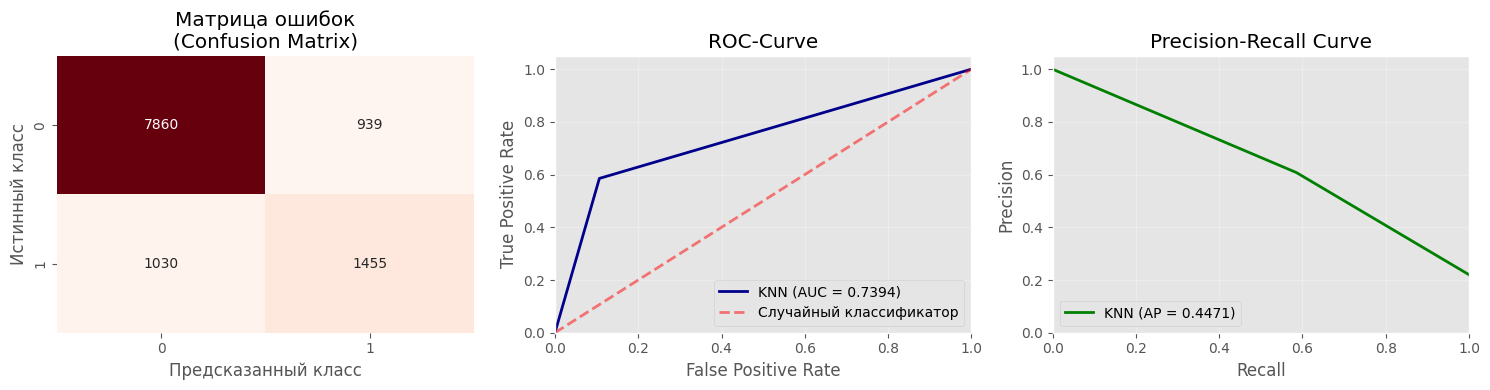


Детали матрицы ошибок:
True Negative (TN): 7860
False Positive (FP): 939
False Negative (FN): 1030
True Positive (TP): 1455
Специфичность: 0.8933


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_knn = KNeighborsClassifier(
    n_neighbors=1,
    metric='manhattan', 
    weights='distance'
)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
y_pred_proba = model_knn.predict_proba(X_test)[:, 1]

#Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall'] 
f1 = report['1']['f1-score']

#Метрики
print("МЕТРИКИ KNN МОДЕЛИ:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}") 
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

print("\nДетальный отчет:")
print(classification_report(y_test, y_pred))

#1. Матрица ошибок
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Матрица ошибок\n(Confusion Matrix)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

#2. ROC-кривая
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.5, label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

#3. Precision-Recall Curve
plt.subplot(1, 3, 3)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
plt.plot(recall_vals, precision_vals, color='green', lw=2, 
         label=f'KNN (AP = {average_precision:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная статистика
tn, fp, fn, tp = cm.ravel()
print(f"\nДетали матрицы ошибок:")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}") 
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")
print(f"Специфичность: {tn/(tn+fp):.4f}")

Оптимальное n_neighbors: 15
Лучшая точность CV: 0.8501


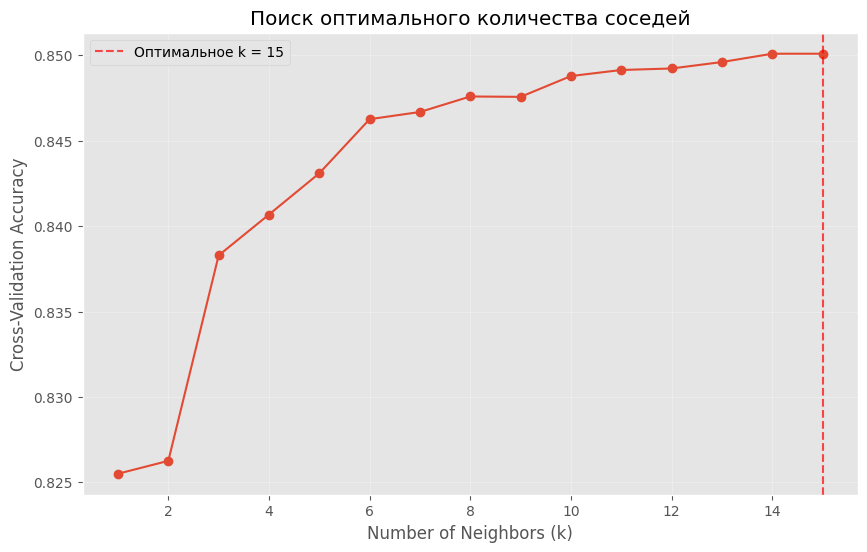

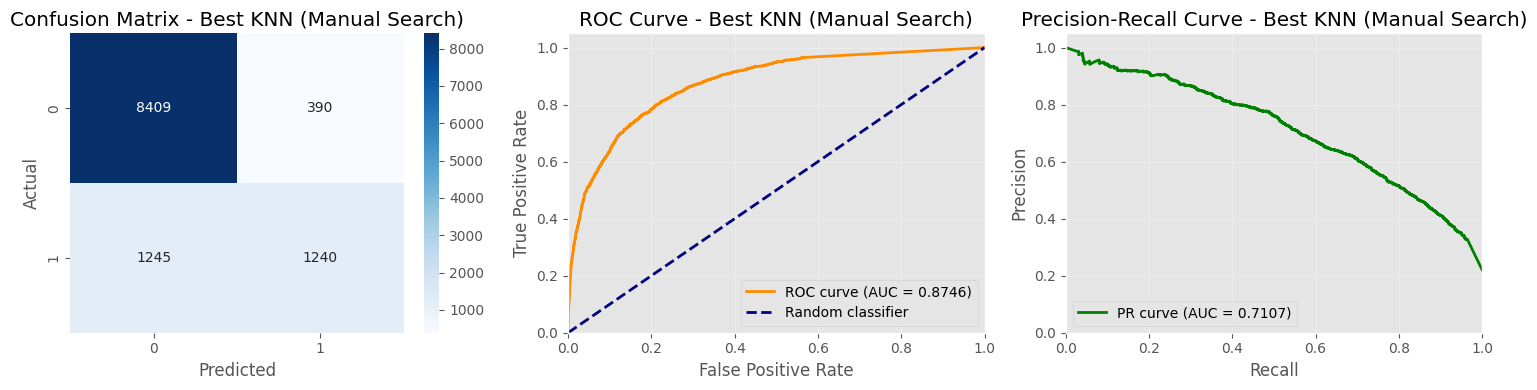


МЕТРИКИ ЛУЧШЕЙ МОДЕЛИ KNN (РУЧНОЙ ПОИСК):
Accuracy:  0.8551
Precision: 0.7607
Recall:    0.4990
F1-Score:  0.6027
ROC-AUC:   0.8746
Параметры модели: n_neighbors=15, metric=manhattan, weights=distance

ДЕТАЛЬНЫЙ АНАЛИЗ МАТРИЦЫ ОШИБОК:
True Negative (TN):  8409
False Positive (FP): 390
False Negative (FN): 1245
True Positive (TP):  1240

Дополнительные метрики:
Специфичность: 0.9557
False Negative Rate: 0.5010
False Positive Rate: 0.0443


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ручной перебор n_neighbors
neighbors_range = range(1, 16)
cv_scores = []

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Находим оптимальное k
optimal_k = neighbors_range[np.argmax(cv_scores)]
best_cv_score = max(cv_scores)
print(f"Оптимальное n_neighbors: {optimal_k}")
print(f"Лучшая точность CV: {best_cv_score:.4f}")

# Обучаем лучшую модель с найденным k
best_knn_manual = KNeighborsClassifier(
    n_neighbors=optimal_k, 
    metric='manhattan', 
    weights='distance'
)
best_knn_manual.fit(X_train, y_train)

# Делаем предсказания
y_pred_best_manual = best_knn_manual.predict(X_test)
y_pred_proba_best_manual = best_knn_manual.predict_proba(X_test)[:, 1]

# Визуализация поиска оптимального k
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Поиск оптимального количества соседей')
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Оптимальное k = {optimal_k}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Создаем визуализации для лучшей модели
plt.figure(figsize=(15, 4))

# 1. Матрица ошибок
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best_manual)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best KNN (Manual Search)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. ROC кривая
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best_manual)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best KNN (Manual Search)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 3. Precision-Recall кривая
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best_manual)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Best KNN (Manual Search)')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод метрик лучшей модели
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

accuracy_best_manual = accuracy_score(y_test, y_pred_best_manual)
precision_best_manual = precision_score(y_test, y_pred_best_manual)
recall_best_manual = recall_score(y_test, y_pred_best_manual)
f1_best_manual = f1_score(y_test, y_pred_best_manual)
roc_auc_best_manual = roc_auc_score(y_test, y_pred_proba_best_manual)

print("\nМЕТРИКИ ЛУЧШЕЙ МОДЕЛИ KNN (РУЧНОЙ ПОИСК):")
print("=" * 50)
print(f"Accuracy:  {accuracy_best_manual:.4f}")
print(f"Precision: {precision_best_manual:.4f}")
print(f"Recall:    {recall_best_manual:.4f}")
print(f"F1-Score:  {f1_best_manual:.4f}")
print(f"ROC-AUC:   {roc_auc_best_manual:.4f}")
print(f"Параметры модели: n_neighbors={optimal_k}, metric=manhattan, weights=distance")

# Детальный анализ матрицы ошибок
tn, fp, fn, tp = cm.ravel()

print("\nДЕТАЛЬНЫЙ АНАЛИЗ МАТРИЦЫ ОШИБОК:")
print("=" * 35)
print(f"True Negative (TN):  {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP):  {tp}")

# Дополнительные метрики
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

print(f"\nДополнительные метрики:")
print(f"Специфичность: {specificity:.4f}")
print(f"False Negative Rate: {fnr:.4f}")
print(f"False Positive Rate: {fpr_rate:.4f}")

Точность модели Random Forest: 0.8611

Детальный отчет:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      8799
           1       0.77      0.53      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



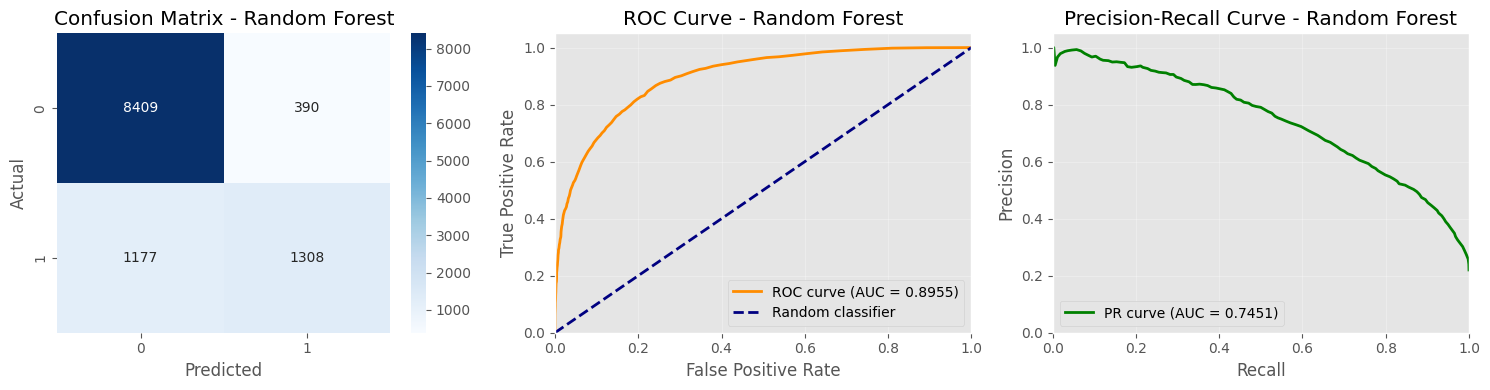


МЕТРИКИ МОДЕЛИ RANDOM FOREST:
Accuracy:  0.8611
Precision: 0.7703
Recall:    0.5264
F1-Score:  0.6254
ROC-AUC:   0.8955
Параметры: n_estimators=120, max_depth=50


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Создание и обучение модели Random Forest
model_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=120,
    max_depth=50
)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели Random Forest: {accuracy:.4f}")
print("\nДетальный отчет:")
print(classification_report(y_test, y_pred))

# Создаем визуализации для Random Forest
plt.figure(figsize=(15, 4))

# 1. Матрица ошибок
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. ROC кривая
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 3. Precision-Recall кривая
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод дополнительных метрик
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

print("\nМЕТРИКИ МОДЕЛИ RANDOM FOREST:")
print("=" * 45)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_auc_rf:.4f}")
print(f"Параметры: n_estimators=120, max_depth=50")


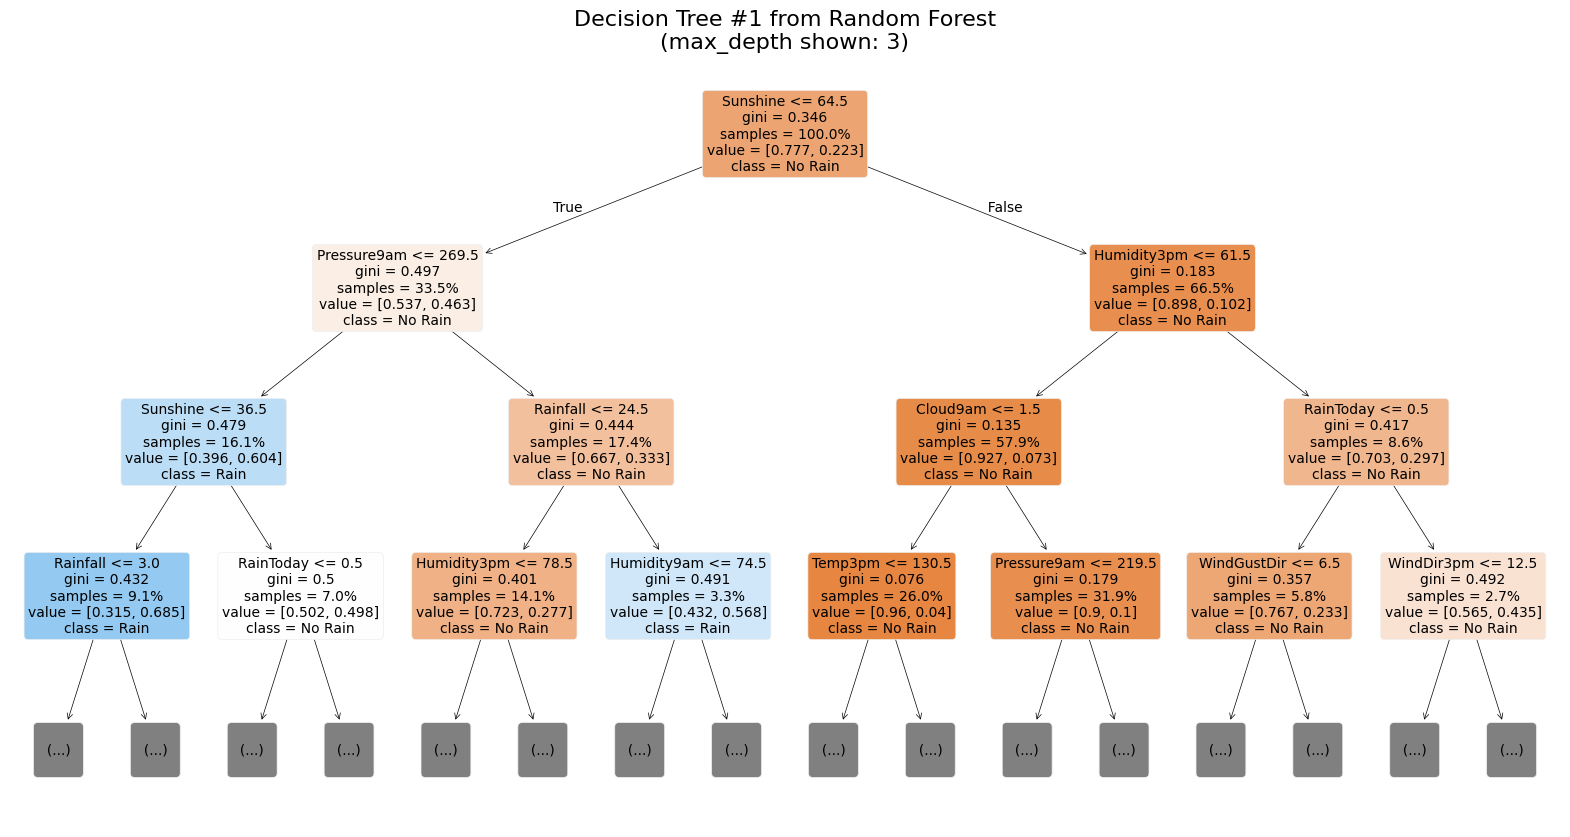

In [24]:
# Визуализация одного дерева из ансамбля
plt.figure(figsize=(20, 10))
tree_to_plot = 0  # Первое дерево в ансамбле

plot_tree(
    model_rf.estimators_[tree_to_plot],
    feature_names=X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])],
    class_names=['No Rain', 'Rain'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=3,  # Ограничиваем глубину для читаемости
    fontsize=10
)

plt.title(f'Decision Tree #{tree_to_plot + 1} from Random Forest\n(max_depth shown: 3)', fontsize=16)
plt.show()

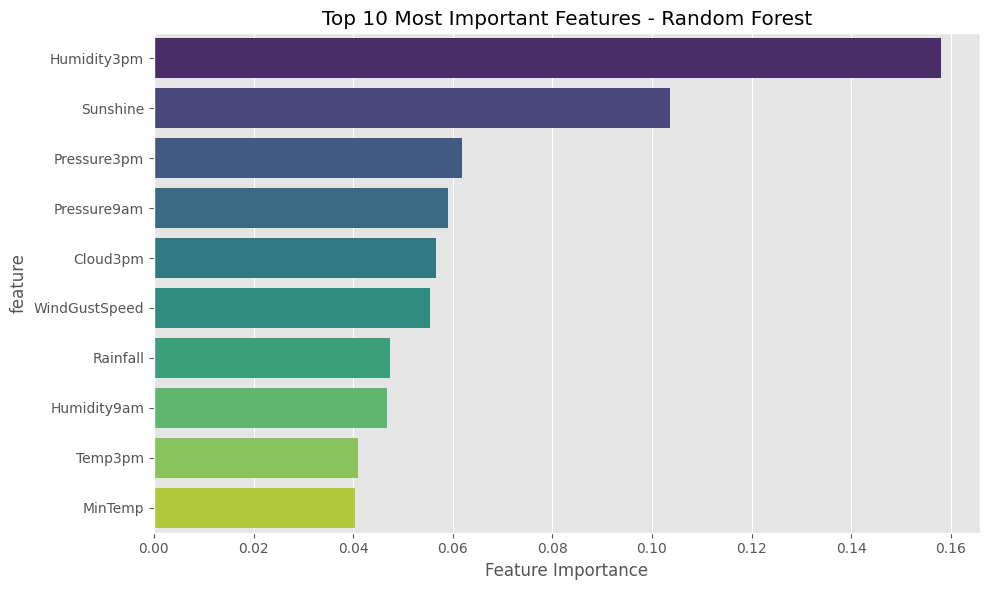


Топ-10 самых важных признаков:
      feature  importance
  Humidity3pm    0.157984
     Sunshine    0.103724
  Pressure3pm    0.061876
  Pressure9am    0.059003
     Cloud3pm    0.056690
WindGustSpeed    0.055447
     Rainfall    0.047408
  Humidity9am    0.046787
      Temp3pm    0.041056
      MinTemp    0.040430


In [29]:
# Важность признаков в Random Forest
feature_importance = model_rf.feature_importances_
feature_names = X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Визуализация важности признаков (исправленная версия)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='feature', 
            legend=False, palette='viridis')
plt.title('Top 10 Most Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("\nТоп-10 самых важных признаков:")
print(importance_df.head(10).to_string(index=False))

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Определяем параметры для поиска
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
}

# Создаем модель дерева решений
dt = DecisionTreeClassifier(random_state=42)

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Запускаем поиск
print("Запуск поиска лучших параметров для Decision Tree...")
grid_search.fit(X_train, y_train)

# Выводим результаты
print("\n" + "="*50)
print("ЛУЧШИЕ ПАРАМЕТРЫ ДЕРЕВА РЕШЕНИЙ:")
print("="*50)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность CV: {grid_search.best_score_:.4f}")

# Обучаем модель с лучшими параметрами
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
y_pred_proba_best = best_dt.predict_proba(X_test)[:, 1]

# Оценка на тестовых данных
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Точность на тестовых данных: {accuracy_best:.4f}")

print("\nДетальный отчет для лучшей модели:")
print(classification_report(y_test, y_pred_best))

Запуск поиска лучших параметров для Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

ЛУЧШИЕ ПАРАМЕТРЫ ДЕРЕВА РЕШЕНИЙ:
Лучшие параметры: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучшая точность CV: 0.8467
Точность на тестовых данных: 0.8447

Детальный отчет для лучшей модели:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8799
           1       0.73      0.47      0.57      2485

    accuracy                           0.84     11284
   macro avg       0.80      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



Точность модели SVM: 0.8538

Детальный отчет:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8799
           1       0.79      0.46      0.58      2485

    accuracy                           0.85     11284
   macro avg       0.83      0.71      0.75     11284
weighted avg       0.85      0.85      0.84     11284



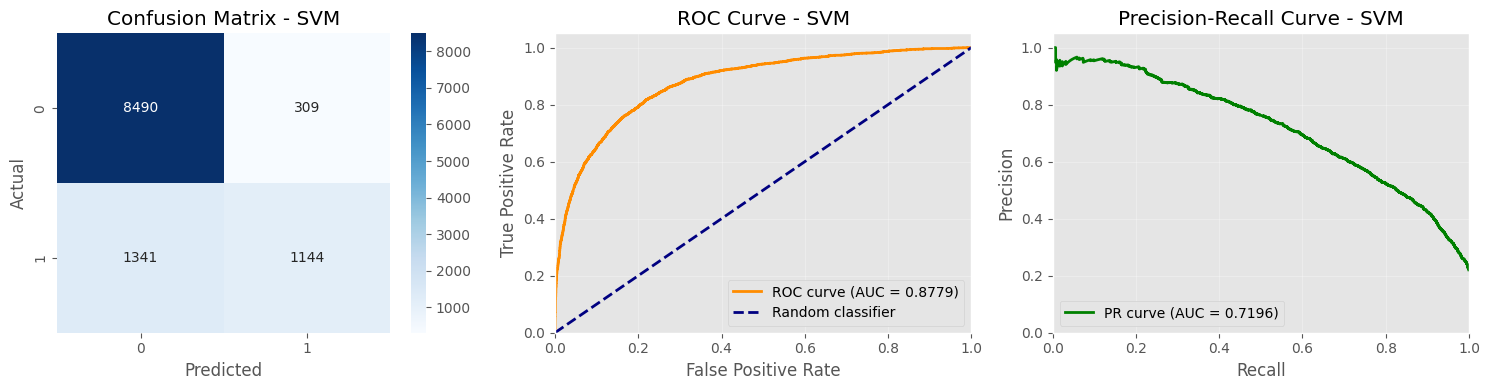


МЕТРИКИ МОДЕЛИ SVM:
Accuracy:  0.8538
Precision: 0.7873
Recall:    0.4604
F1-Score:  0.5810
ROC-AUC:   0.8779
Параметры модели: kernel=rbf, C=1.0, gamma=scale


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Создание и обучение модели SVM
model_svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True  # Включаем вероятности для ROC и PR кривых
)

model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
y_pred_proba = model_svm.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели SVM: {accuracy:.4f}")
print("\nДетальный отчет:")
print(classification_report(y_test, y_pred))

# Создаем визуализации для SVM модели
plt.figure(figsize=(15, 4))

# 1. Матрица ошибок
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. ROC кривая
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 3. Precision-Recall кривая
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод дополнительных метрик
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba)

print("\nМЕТРИКИ МОДЕЛИ SVM:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall:    {recall_svm:.4f}")
print(f"F1-Score:  {f1_svm:.4f}")
print(f"ROC-AUC:   {roc_auc_svm:.4f}")
print(f"Параметры модели: kernel=rbf, C=1.0, gamma=scale")

СРАВНЕНИЕ МОДЕЛЕЙ ПО МЕТРИКАМ:
        Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
          KNN    0.8551     0.7607  0.4990    0.6027   0.8746
          SVM    0.8538     0.7873  0.4604    0.5810   0.8779
Random Forest    0.8611     0.7703  0.5264    0.6254   0.8955


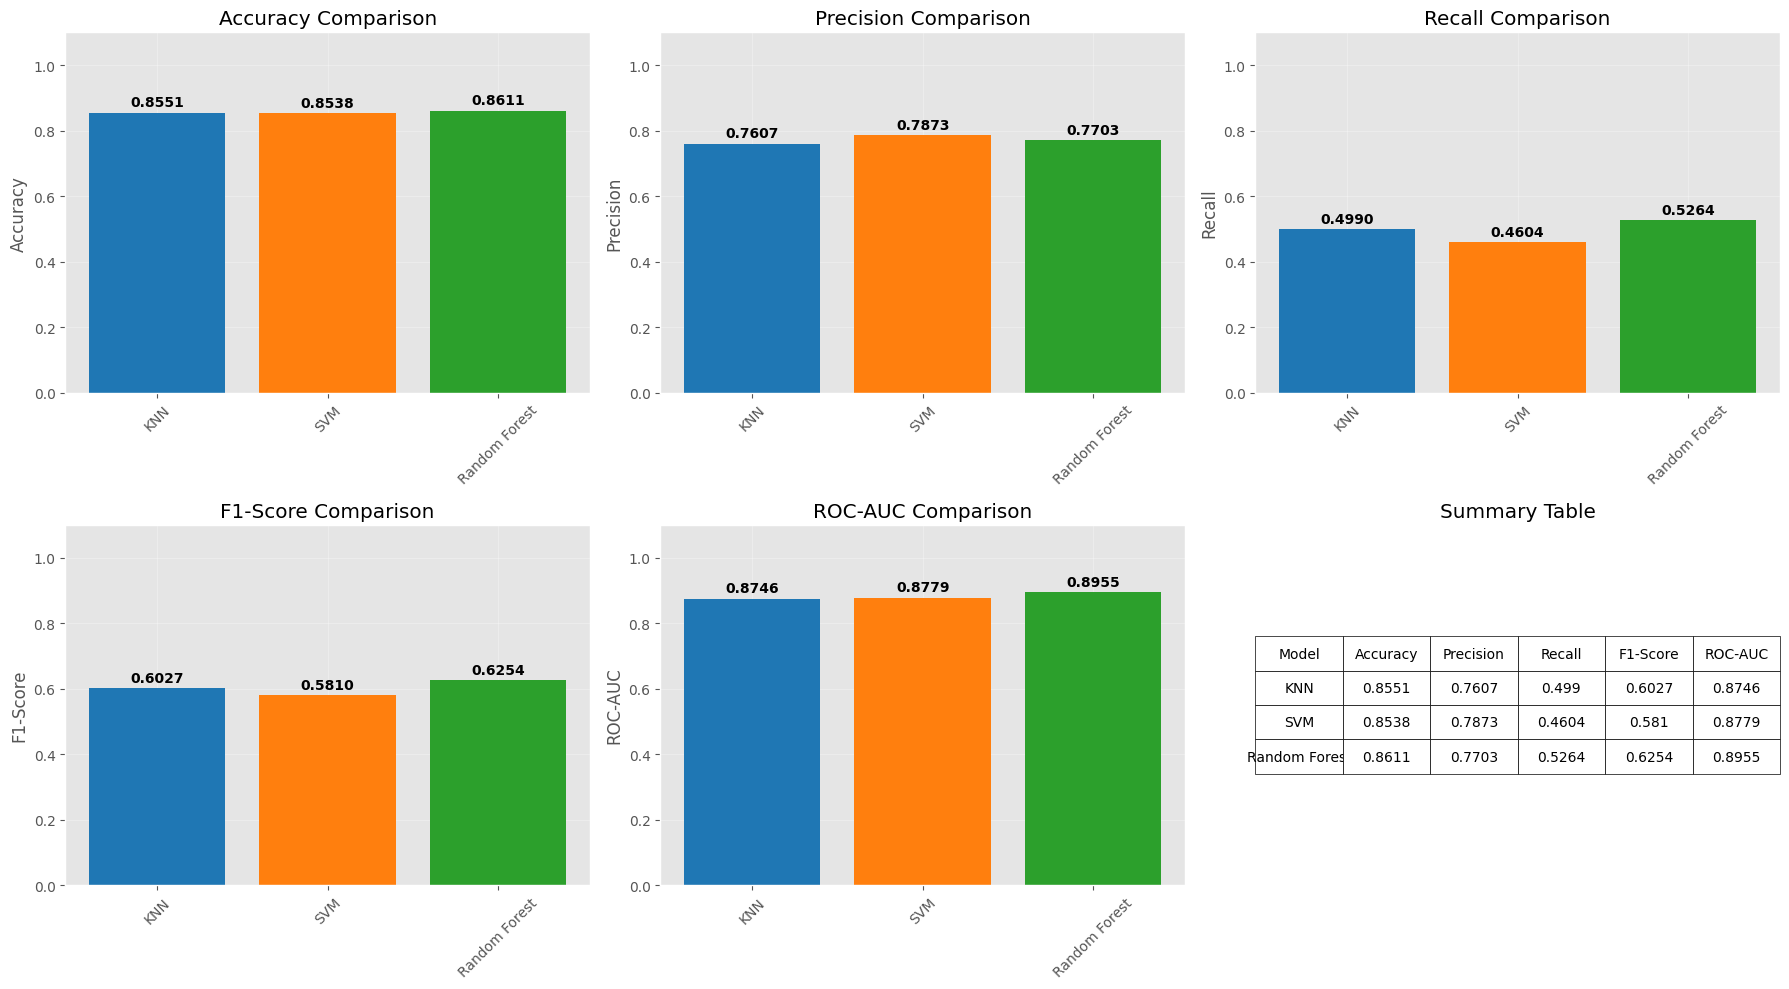

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Модели для сравнения
models = {
    'KNN': best_knn_manual,
    'SVM': model_svm, 
    'Random Forest': model_rf
}

# Собираем метрики для всех моделей
results = []

for name, model in models.items():
    # Получаем предсказания
    y_pred = model.predict(X_test)
    
    # Основные метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC если доступно
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        # Для SVM без вероятностей используем бинарные предсказания
        roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)
print("СРАВНЕНИЕ МОДЕЛЕЙ ПО МЕТРИКАМ:")
print("=" * 70)
print(results_df.round(4).to_string(index=False))

# Визуализация сравнения метрик
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Цвета для моделей
colors = {'KNN': '#1f77b4', 'SVM': '#ff7f0e', 'Random Forest': '#2ca02c'}

# 1. Accuracy
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], 
               color=[colors[model] for model in results_df['Model']])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 2. Precision
axes[0, 1].bar(results_df['Model'], results_df['Precision'],
               color=[colors[model] for model in results_df['Model']])
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')
for i, v in enumerate(results_df['Precision']):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Recall
axes[0, 2].bar(results_df['Model'], results_df['Recall'],
               color=[colors[model] for model in results_df['Model']])
axes[0, 2].set_title('Recall Comparison')
axes[0, 2].set_ylabel('Recall')
for i, v in enumerate(results_df['Recall']):
    axes[0, 2].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. F1-Score
axes[1, 0].bar(results_df['Model'], results_df['F1-Score'],
               color=[colors[model] for model in results_df['Model']])
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_ylabel('F1-Score')
for i, v in enumerate(results_df['F1-Score']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 5. ROC-AUC
axes[1, 1].bar(results_df['Model'], results_df['ROC-AUC'],
               color=[colors[model] for model in results_df['Model']])
axes[1, 1].set_title('ROC-AUC Comparison')
axes[1, 1].set_ylabel('ROC-AUC')
for i, v in enumerate(results_df['ROC-AUC']):
    axes[1, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 6. Сводная таблица
axes[1, 2].axis('off')
table_data = results_df.round(4).values
table = axes[1, 2].table(cellText=table_data,
                        colLabels=results_df.columns,
                        cellLoc='center',
                        loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 2].set_title('Summary Table')

# Настройка внешнего вида
for ax in axes.flat:
    if ax != axes[1, 2]:
        ax.set_ylim(0, 1.1)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

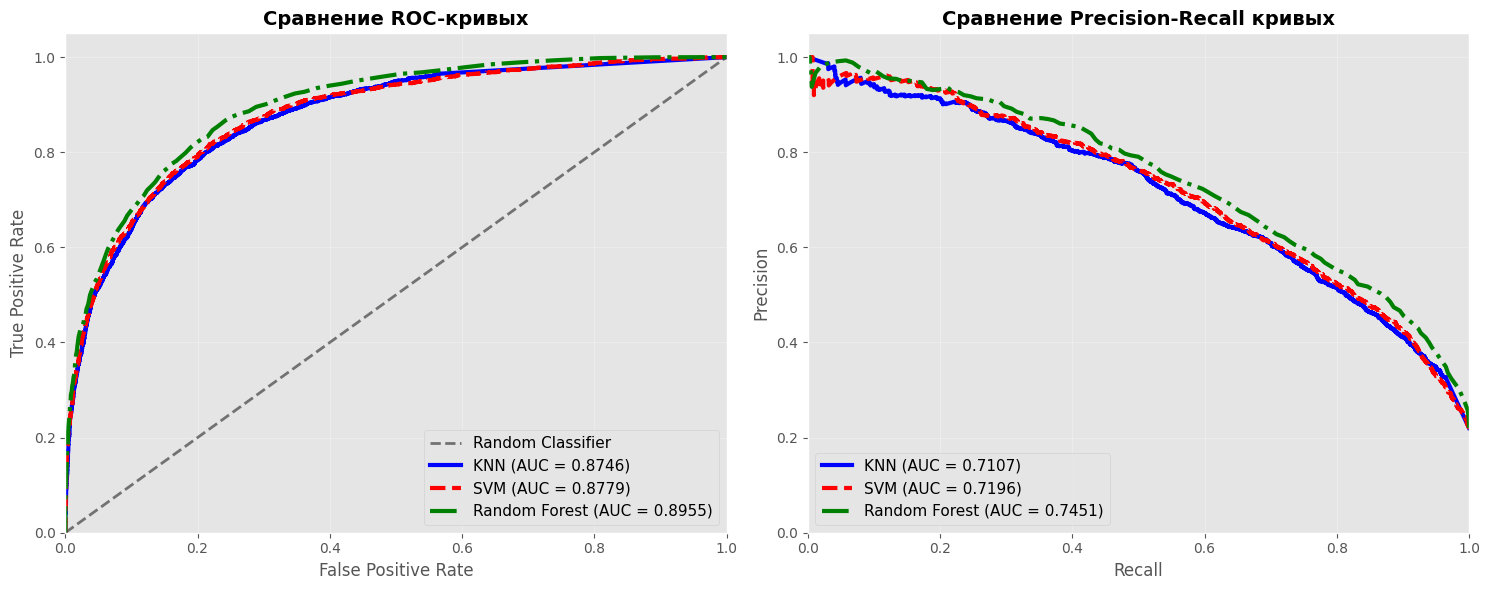

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

plt.figure(figsize=(15, 6))

# 1. ROC-кривые
plt.subplot(1, 2, 1)

# Базовая линия (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier', linewidth=2)

colors = {'KNN': 'blue', 'SVM': 'red', 'Random Forest': 'green'}
line_styles = {'KNN': '-', 'SVM': '--', 'Random Forest': '-.'}

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Для SVM используем decision_function для более гладкой кривой
        if hasattr(model, 'decision_function'):
            y_scores = model.decision_function(X_test)
            y_pred_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        else:
            y_pred_proba = model.predict(X_test).astype(float)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 
            color=colors[name],
            linestyle=line_styles[name],
            linewidth=3,
            label=f'{name} (AUC = {roc_auc:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Сравнение ROC-кривых', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# 2. Precision-Recall кривые
plt.subplot(1, 2, 2)

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        if hasattr(model, 'decision_function'):
            y_scores = model.decision_function(X_test)
            y_pred_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        else:
            y_pred_proba = model.predict(X_test).astype(float)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision,
            color=colors[name],
            linestyle=line_styles[name],
            linewidth=3,
            label=f'{name} (AUC = {pr_auc:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Сравнение Precision-Recall кривых', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()